In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit



In [2]:
# df2 = pd.read_csv('data_csv.csv', index_col='loan_applicant_id')
# df2.head()
# df2 = df2.dropna()

df2 = pd.read_csv('application_train.csv/application_train.csv')#, index_col='SK_ID_CURR')
df2.head()
# very strong definition of failure so maybe not the best data set
# 	Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
# df2 = df2.dropna()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# x = df2['household_income'].values
# y = df2['y'].values
# print(x,y, sep="\n")
# print(type(x), type(y), sep="\n")

x = df2['AMT_INCOME_TOTAL'].values
y1 = df2['TARGET'].values
y = np.array([1 if i==0 else 0 for i in y1])
print(x,y,len(x),len(y), sep="\n")
print(type(x), type(y), sep="\n")

[202500. 270000.  67500. ... 153000. 171000. 157500.]
[0 1 1 ... 1 0 1]
307511
307511
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
import matplotlib.pyplot as plt

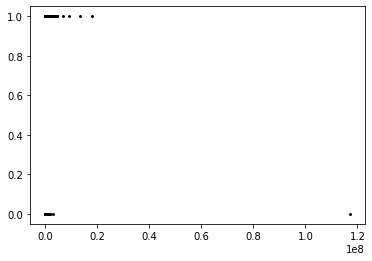

In [5]:
plt.scatter(x, y, color="black", marker = "X", s=3)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

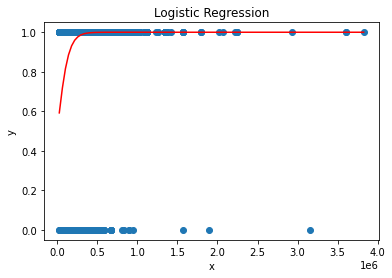

In [7]:
logreg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)


# # Visualising the Training set results
plt.scatter(x_test, y_test)

# create a line plot of the logistic regression model
X = np.linspace(x_test.min(), x_test.max(), 100)
Y = logreg.predict_proba(X.reshape(-1,1))[:,1]
plt.plot(X, Y, color='red')

# show the scatter plot and line plot on the same graph
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression')
plt.show()

In [8]:


import seaborn as sns

<AxesSubplot:>

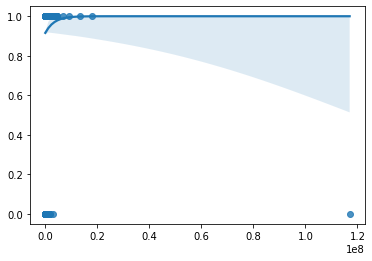

In [9]:
sns.regplot(x=x, y=y, data=df2, logistic=True)

# Try do manually

In [10]:
from scipy.stats import norm
import math
def f(x,b,mu,sigma):
    # def f(x,a,b): 
    # Not factoring in T since we don't know the time period
    # th1 = np.log(b,where=b>0)
    th2 = np.log(x,where=x>0)
    # th1[b<=0] = 0
    # th2[x<=0] = 0
    # t1 = th1 - th2
    # print(b,x)
    # t1 = b/x if b>0 and x>0 else [0 for i in range(len(x))]
    t1 = [math.log1p(b/i) if i>0 else 0 for i in b/x]
    # print(t1)
    # t1 = np.log(b, where=b>0) - np.log(x, where=x>0)
    # # print(t1, b, x)
    # # print(t1.shape, b.shape, x.shape)
    # # t1 = math.log(b) - math.log(x)
    t2 = (mu -(sigma**2)/2)
    t3 = (t1 - t2)/sigma
    # print(t3)
    result = scal* norm.cdf(t3)
    # print(result)
    # result = [i[0] for i in result]
    # result = np.array(result)
    #print(type(result), result) #, result)


    # result = a*x +b
    # result = [i[0] for i in result]
    return result

In [11]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x_train.astype(float), y_train.astype(float),maxfev=1000000)

NameError: name 'scal' is not defined

In [ ]:
popt

array([1.75449238e+02, 5.49451392e+00, 7.64730042e-04])

In [ ]:
pcov

array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

In [ ]:
print(min(x_test), max(x_test))

[14] [446]


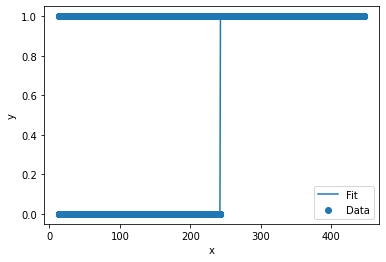

In [ ]:
# generate some sample data
# X = 
# ydata = func(X, 2.5, 1.3, 0.5) + 0.2 * np.random.normal(size=len(xdata))

# perform the curve fit
# popt, pcov = curve_fit(func, xdata, ydata)

# plot the original data
plt.scatter(x_test, y_test, label='Data')
# Ommitted

# plot the fitted curve
xfit = np.linspace(x_test.min(), x_test.max(), 100000)
yfit = f(xfit, *popt)
plt.plot(xfit, yfit, label='Fit')

# add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# show the plot
plt.show()

In [ ]:
# Comparision of mean squared error for both models
# Our model
from sklearn.metrics import mean_squared_error
predictions = f(x_test, *popt)
print(mean_squared_error(y_test, predictions))

# Log model
predictions = logreg.predict(x_test)
print(mean_squared_error(y_test, predictions))



0.061374969329892004
0.08080023307759542


Same thing with a new dataset :)

In [ ]:
df2 = pd.read_csv('application_train.csv/application_train.csv', index_col='SK_ID_CURR')
df2.head()
df2 = df2.dropna()